In [1]:
#importing dependecies
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#reading dataset
df= pd.read_csv('LoanStats3a.csv',low_memory=False,skiprows=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(42538, 145)

In [4]:
DICT=df.isnull().sum()

In [5]:
#columns with more than 40k NaN values
l=[]
for i in range(0,145,1):
    if DICT[i]>40000:
        l.append(i)
#print(l)

In [6]:
#Dropping the above listed columns
for i in reversed(l):
    df=df.drop(df.columns[i],axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [7]:
#checking number of null values
df.isnull().sum()

loan_amnt                         3
funded_amnt                       3
funded_amnt_inv                   3
term                              3
int_rate                          3
installment                       3
grade                             3
sub_grade                         3
emp_title                      2629
emp_length                     1115
home_ownership                    3
annual_inc                        7
verification_status               3
issue_d                           3
loan_status                       3
pymnt_plan                        3
desc                          13296
purpose                           3
title                            16
zip_code                          3
addr_state                        3
dti                               3
delinq_2yrs                      32
earliest_cr_line                 32
inq_last_6mths                   32
mths_since_last_delinq        26929
mths_since_last_record        38887
open_acc                    

In [8]:
#reduced dataframe shape
df.shape

(42538, 57)

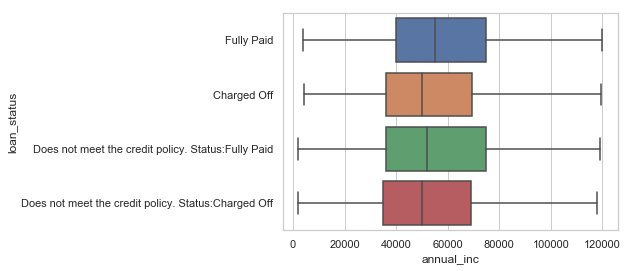

In [9]:
#boxplot representing relation between loan status and annual income
sns.set(style='whitegrid')
bp= sns.boxplot(x=df.annual_inc.loc[df.annual_inc<120000],y=df.loc[:,'loan_status'])

C:\Users\kusha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


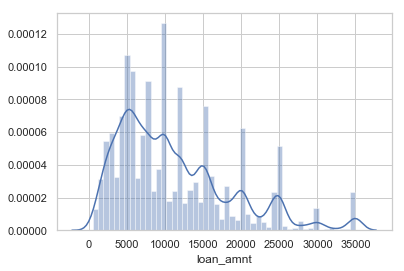

In [10]:
#Probability distribution for loan amount
loan_amount=df.loc[df.loan_amnt.notnull()]
lm= sns.distplot(loan_amount.loc[:,'loan_amnt'])

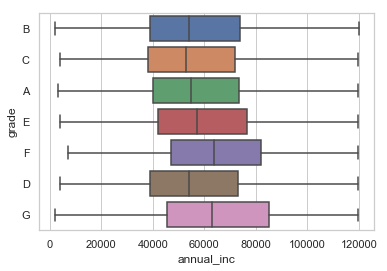

In [11]:
##boxplot representing relation between grade and annual income
ap_typ= sns.boxplot(x=df.annual_inc.loc[df.annual_inc<120000],y=df.loc[:,'grade'])

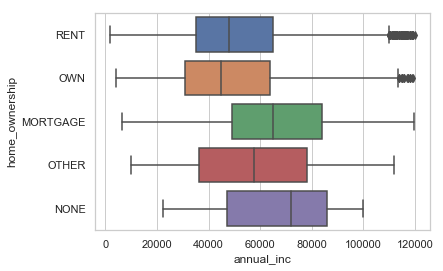

In [12]:
#new dataframe with non null values
home=df.loc[df.home_ownership.notnull() & df.annual_inc<120000]

#boxplot representing relation between Home Ownership and annual income
home_ownershipVsAnnual_inc= sns.boxplot(x=df.annual_inc.loc[df.annual_inc<120000],y=df.loc[:,'home_ownership'])    

In [13]:
# Data Preprocessing: 
# emp_length had values of the form '6 years', '< 1 year', '10+ years'
# Here data is converted to form '6','0.7','10' respectively 

# for i in range(0,42538):
#     if pd.isnull(df.loc[i,'emp_length']):
#         continue

#     word=str(df.loc[i,'emp_length'])
#     df.loc[i,'emp_length']=''
#     for w in word:
#         if w=='<':
#             df.loc[i,'emp_length']=0.7
#             break;
        
#         if w=='+' or w==' ':
#             break
#         df.loc[i,'emp_length']=str(df.loc[i,'emp_length']) + w

In [14]:
# Data Preprocessing
# emp_length had values of the form '6%', '12.54%'
# Here data is converted to form '6','12.54' respectively 
# for i in range(0,42538):
#     if pd.isnull(df.loc[i,'int_rate']):
#         continue

#     word=str(df.loc[i,'int_rate'])
#     df.loc[i,'int_rate']=''
#     for w in word:
#         if w=='%':
#             break
#         df.loc[i,'int_rate']=str(df.loc[i,'int_rate']) + w

In [15]:
#modified data
df.loc[:5,['loan_amnt','funded_amnt','emp_length','int_rate']]

,loan_amnt,funded_amnt,emp_length,int_rate
0,5000.0,5000.0,10+ years,10.65%
1,2500.0,2500.0,< 1 year,15.27%
2,2400.0,2400.0,10+ years,15.96%
3,10000.0,10000.0,10+ years,13.49%
4,3000.0,3000.0,1 year,12.69%
5,5000.0,5000.0,3 years,7.90%


In [16]:
#saving the data to a new csv file
#df.to_csv('loan_data_clean.csv',sep=',',index=False)

In [22]:
#data is preprocessed once and stored in this file
#read clean data from this file
new_df=pd.read_csv('loan_data_clean.csv',low_memory=False)
new_df.head()
df=new_df

In [23]:
#importing libraries for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
#Selecting predictor and target variables
dat= df.loc[df.loan_amnt.notnull() & df.funded_amnt.notnull() & df.emp_length.notnull() & df.int_rate.notnull()]

#predictor variables are stored in X
#target variable stored in Y
X= dat.loc[:,['loan_amnt','funded_amnt','emp_length','int_rate']]
Y= dat.loan_status.loc[df.loan_status.notnull()]

In [25]:
#Splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [26]:
#applying Naive Bayes model to predict loan Status

model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

y_pred_nb_grade=model_nb.predict(x_test)
y_pred_nb_grade

#accuracy score comes out to be 0.789
accuracy_score(y_test,y_pred_nb_grade)


0.7890270665691295